# Handwritten Digit Classification using CNN
Ensure you are using GPU
Runtime -> Change Runtime Type -> T4 GPU

In [1]:
from keras.datasets import mnist

(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

e:\ML-Wakad-Weekdays-5-7-pm-11th-Dec\.venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
xtrain[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [3]:
ytrain[0]

np.uint8(5)

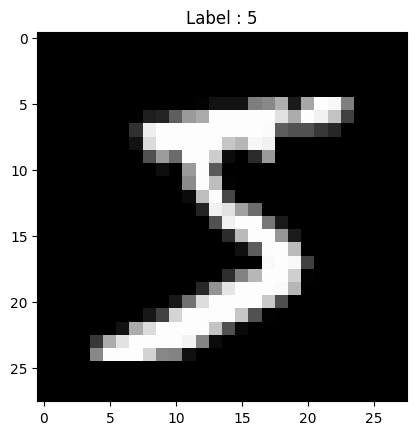

In [4]:
import matplotlib.pyplot as plt

plt.imshow(xtrain[0], cmap="gray")
plt.title(f"Label : {ytrain[0]}")
plt.show()

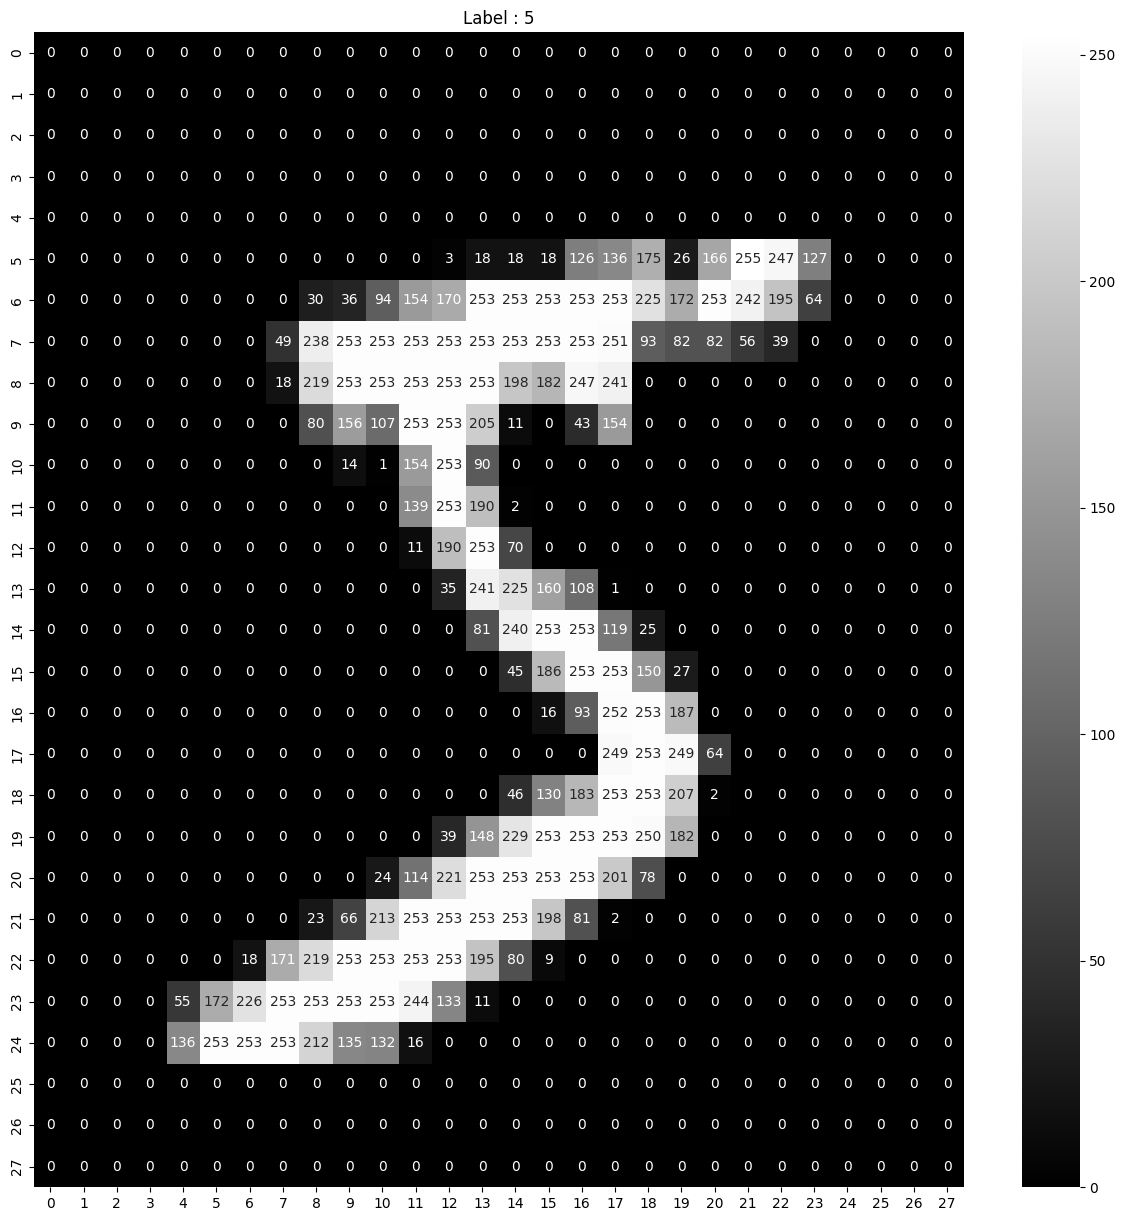

In [5]:
import seaborn as sns

plt.figure(figsize=(15, 15))
sns.heatmap(xtrain[0], cmap="gray", annot=True, fmt="d")
plt.title(f"Label : {ytrain[0]}")
plt.show()

# Visualize random 9 images from the data

In [6]:
xtrain.shape

(60000, 28, 28)

In [7]:
xtest.shape

(10000, 28, 28)

In [8]:
import numpy as np
random_idx = np.random.randint(1, xtrain.shape[0], 9)
random_idx

array([54752, 50552,  3324, 39403, 52835, 57229,  6100, 42078, 35905],
      dtype=int32)

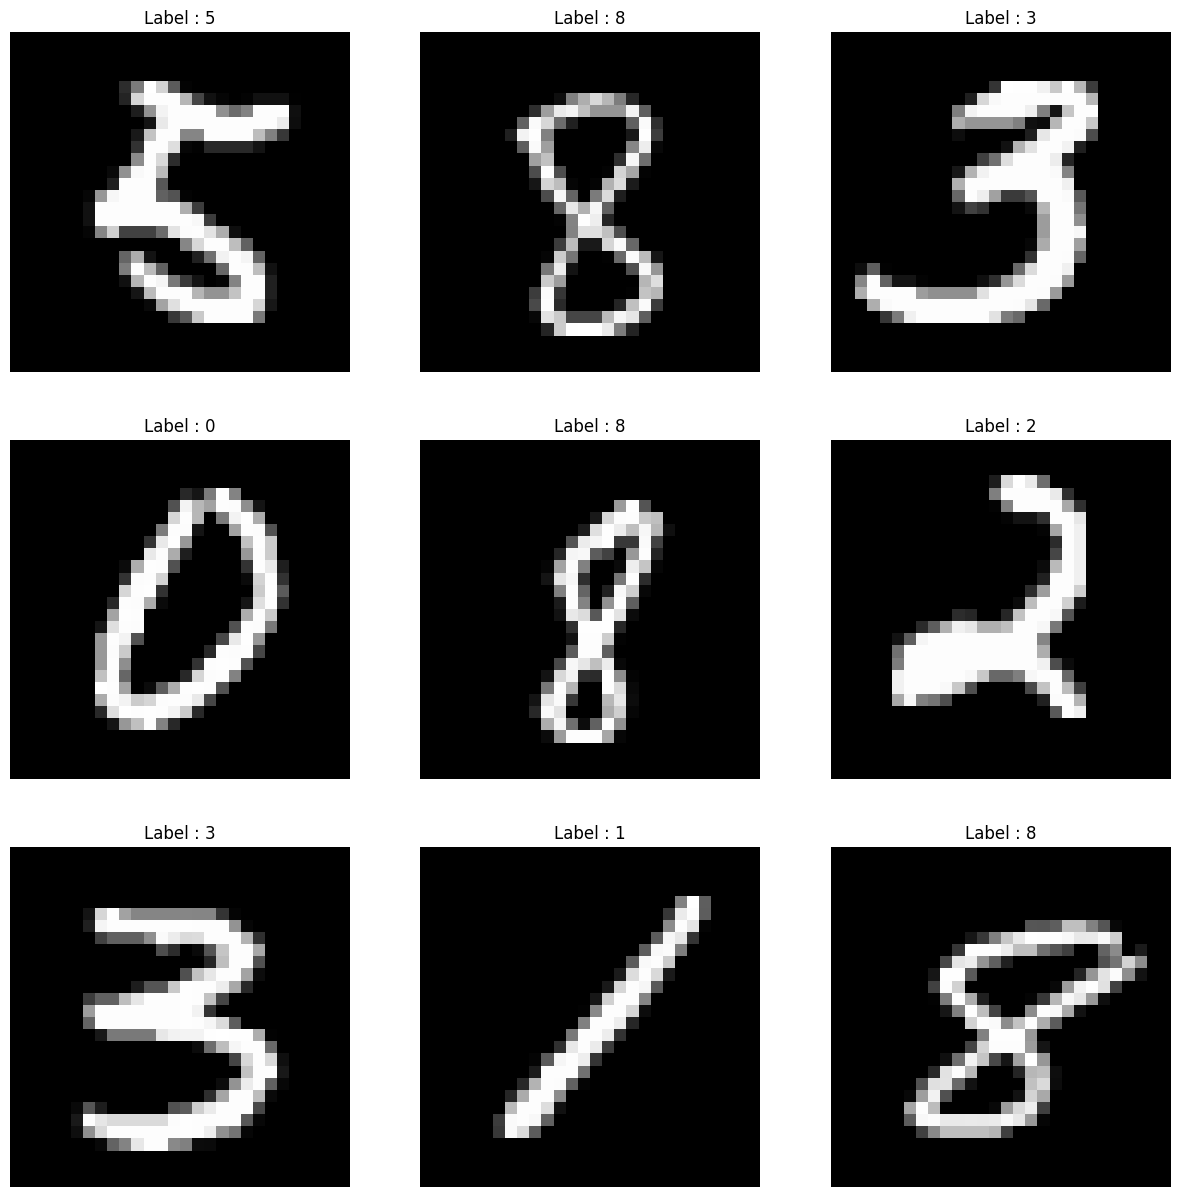

In [9]:
random_idx = np.random.randint(1, xtrain.shape[0], 9)
plt.figure(figsize = (15, 15))
for idx, image in enumerate(random_idx):
  plt.subplot(3, 3, idx + 1)
  plt.imshow(xtrain[image], cmap="gray")
  plt.title(f"Label : {ytrain[image]}")
  plt.axis("off")

plt.show()

# Apply Preprocessing on image
Pixel range is between 0-255

divide image results by 255 in order get values between 0-1

In [10]:
xtrain_pre = xtrain.astype("float32") / 255.0
xtest_pre = xtest.astype("float32") / 255.0

In [11]:
xtrain_pre[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
# add an extra dimension for filters in cnn
xtrain_pre = np.expand_dims(xtrain_pre, -1)
xtest_pre = np.expand_dims(xtest_pre, -1)

In [13]:
xtrain_pre.shape

(60000, 28, 28, 1)

In [14]:
xtest_pre.shape

(10000, 28, 28, 1)

### Convert the ytrain and ytest to categorical

In [15]:
from keras.utils import to_categorical

ytrain_pre = to_categorical(ytrain)
ytest_pre = to_categorical(ytest)

In [16]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [17]:
ytrain_pre[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [18]:
ytest_pre[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

# Build the neural network

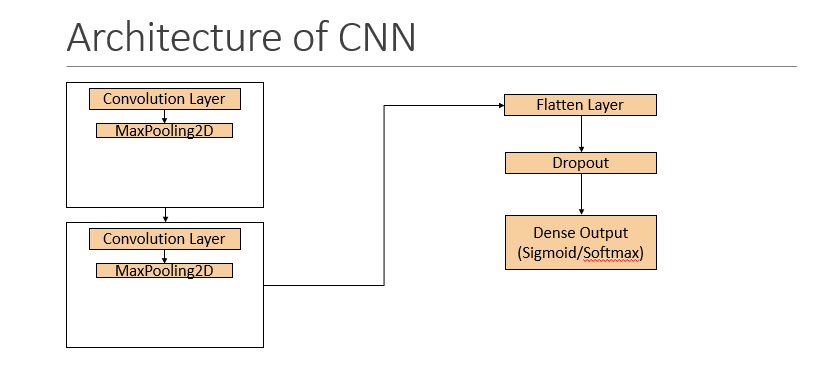

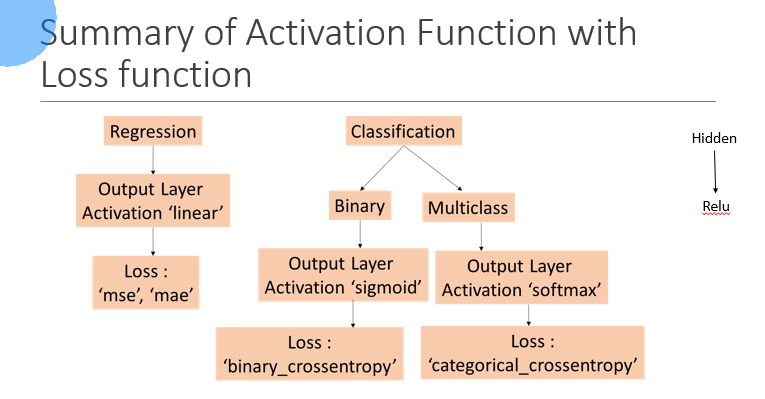

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Convolution2D, MaxPool2D, Flatten, Input

In [20]:
model = Sequential(
    layers = [
        Input(shape=(28, 28, 1)),
        Convolution2D(32, kernel_size=(3, 3), activation="relu"),
        MaxPool2D(pool_size=(2, 2)),
        Convolution2D(64, kernel_size=(3, 3), activation="relu"),
        MaxPool2D(pool_size=(2, 2)),
        Flatten(),
        Dropout(0.5),
        Dense(10, activation="softmax")
    ]
)

In [21]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [22]:
hist = model.fit(xtrain_pre, ytrain_pre, validation_split=0.1, epochs=20, verbose=False)

# Plot the learning curve

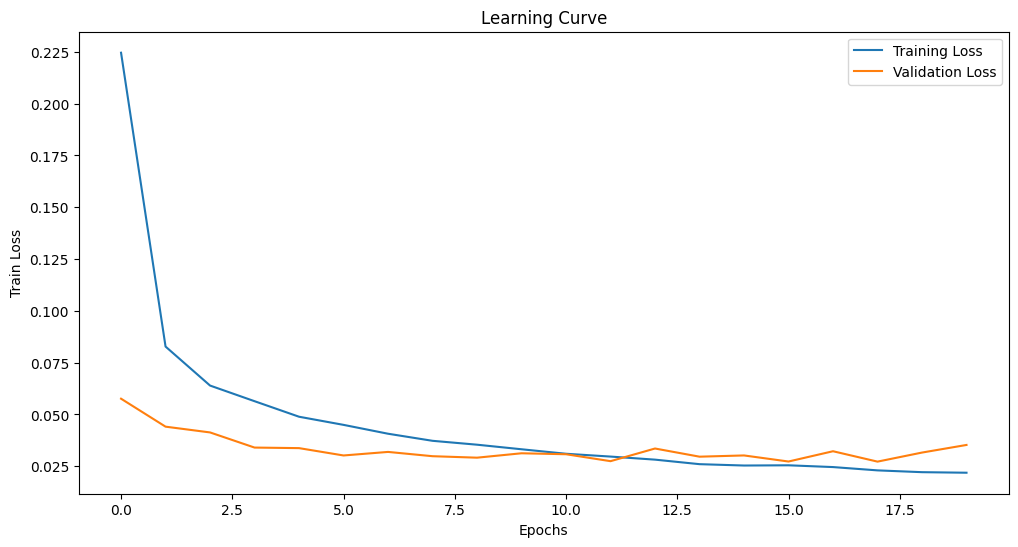

In [23]:
plt.figure(figsize=(12, 6))

plt.plot(hist.history["loss"], label="Training Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Train Loss")
plt.title("Learning Curve")
plt.legend()
plt.show()

# Evaluate the model

In [24]:
train_loss, train_acc = model.evaluate(xtrain_pre, ytrain_pre, verbose=False)
print(f"Train Loss : {train_loss:.4f}")
print(f"Train Accuracy : {train_acc:.4f}")

Train Loss : 0.0098
Train Accuracy : 0.9973


In [25]:
test_loss, test_acc = model.evaluate(xtest_pre, ytest_pre, verbose=False)
print(f"Test loss : {test_loss:.4f}")
print(f"Train Accuracy : {train_acc:.4f}")

Test loss : 0.0248
Train Accuracy : 0.9973


# Plot confusion matrix

In [46]:
yprob_test = model.predict(xtest_pre, verbose=False)
yprob_test[0:5]

array([[2.30189826e-12, 3.59575922e-14, 1.12008545e-08, 1.22664986e-07,
        5.73646736e-18, 8.50452335e-15, 1.50649098e-21, 9.99999881e-01,
        2.69172167e-11, 2.47123877e-09],
       [5.74627412e-09, 2.24124341e-09, 1.00000000e+00, 9.14873455e-11,
        9.36955808e-13, 1.30028044e-17, 2.34270612e-08, 1.76501835e-15,
        2.48483234e-09, 1.42999423e-14],
       [8.35585290e-09, 9.99982834e-01, 4.44778721e-08, 6.41784292e-10,
        1.37821435e-05, 9.05577568e-09, 6.17064302e-08, 2.83884128e-06,
        4.11968784e-07, 2.86519644e-08],
       [9.99961734e-01, 9.09940364e-17, 1.63150546e-07, 1.96140171e-09,
        5.39534944e-11, 6.40334274e-09, 2.65773524e-05, 1.79867276e-12,
        1.48281686e-06, 1.01014220e-05],
       [2.27276423e-12, 7.00068313e-13, 9.55694291e-13, 5.00860204e-14,
        9.99999881e-01, 3.97454388e-14, 2.95392481e-13, 2.11640452e-13,
        6.64355810e-12, 1.45220937e-07]], dtype=float32)

In [27]:
import numpy as np
ypred_test = np.argmax(yprob_test, axis=1)
ypred_test[0:5]

array([7, 2, 1, 0, 4])

In [28]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

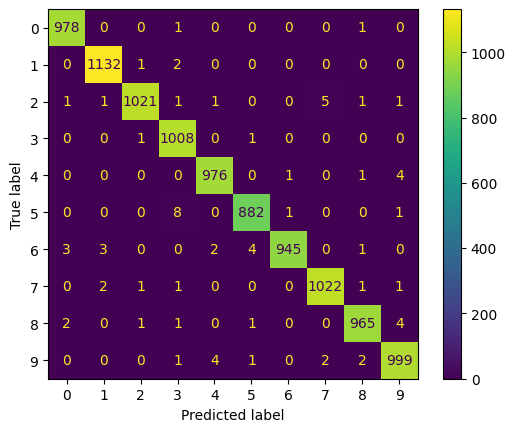

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(ytest, ypred_test)
plt.show()

In [30]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



# above results say that it more than 0.8 accurate hence it is a good model and can be used for out of sample prediction

# Inference

In [31]:
!uv  add  opencv-python

Resolved 55 packages in 22ms
Audited 48 packages in 1ms


In [47]:
import cv2

img = cv2.imread("Example_3.jpg", cv2.IMREAD_GRAYSCALE)

In [48]:
inverted_img = cv2.bitwise_not(img)

In [49]:
img_pre = inverted_img.astype('float32') / 255.0

In [51]:
img_pre = np.expand_dims(img_pre, axis=0)
img_pre.shape

(1, 28, 28)

In [52]:
probs = model.predict([img_pre], verbose=False)

In [37]:
preds = np.argmax(probs, axis=-1)
preds

array([3])

In [38]:
max_probs = np.max(probs)
max_probs

np.float32(1.0)

# Write a function to predict images

In [39]:
def predict_digit(img_path):
  img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
  img_inv = cv2.bitwise_not(img)
  plt.imshow(img_inv, cmap="gray")
  plt.show()
  img_pre = img_inv.astype('float32') / 255.0
  img_pre = np.expand_dims(img_pre, axis=0)
  probs = model.predict([img_pre], verbose=False)
  preds = np.argmax(probs, axis=-1)
  max_probs = np.max(probs)
  return preds, max_probs

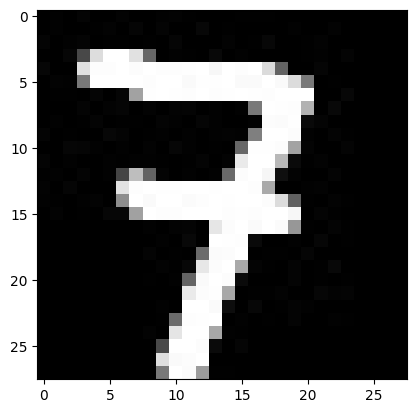

(array([7]), np.float32(0.9999994))

In [40]:
predict_digit("Example_7.jpg")

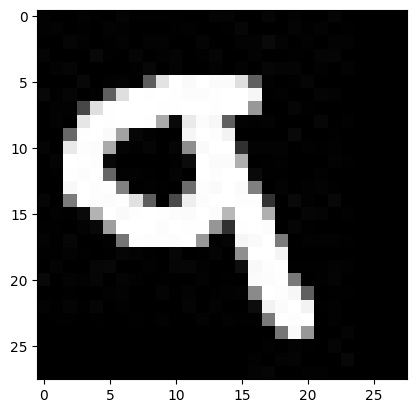

(array([9]), np.float32(0.99719393))

In [41]:
predict_digit("Example_9.jpg")

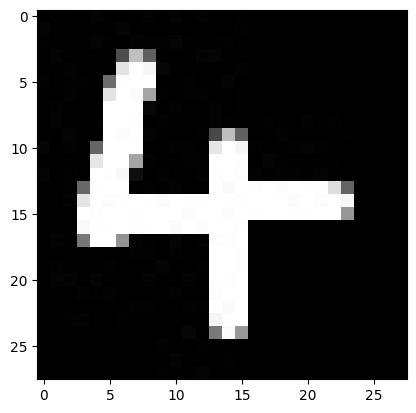

(array([4]), np.float32(1.0))

In [42]:
predict_digit("Example_4.jpg")

# Save the model

In [43]:
model.save("Handwritten_model.keras")

# Load the model object

In [44]:
from keras.models import load_model

m = load_model("Handwritten_model.keras")
m.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,480 (408.13 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 69,654 (272.09 KB)

In [45]:
m.evaluate(xtest_pre, ytest_pre, verbose=False)

[0.02482888102531433, 0.9927999973297119]